In [4]:
import pandas as pd
from pandas_datareader import data
import statistics as stats

In [5]:
start_date = '2014-01-01'
end_date = '2018-01-01'
SRC_DATA_FILENAME = 'goog_data.pkl'

In [7]:
try:
    goog_data2 = pd.read_pickle(SRC_DATA_FILENAME)
except FileNotFoundError:
    goog_data2 = data.DataReader('GOOG', 'yahoo', start_date, end_date)
    goog_data2.to_pickle(SRC_DATA_FILENAME)

In [8]:
goog_data = goog_data2.tail(620)

close = goog_data['Close']

The Simple Moving Average (SMA) is calculated by adding the price of an instrument over a number of time periods  and then dividing the sum by the number of time periods. 
The SMA is basically the average price of the given time period, with equal weighting given to the price of each period.


Simple Moving Average


SMA = ( Sum ( Price, n ) ) / n    


Where: n = Time Period

In [9]:
time_period = 20 # Number of days over which to average
history = [] # to track a history of prices
sma_values = [] # to track simple average values

In [10]:
for close_price in close:
    history.append(close_price)
    if len(history) > time_period:# we remove oldest price because we only average over last time_period prices
        del(history[0])
    sma_values.append(stats.mean(history))

In [14]:
goog_data = goog_data.assign(ClosePrice=pd.Series(close, index=goog_data.index))
goog_data = goog_data.assign(Simple20DayMovingAverage=pd.Series(sma_values, index=goog_data.index))

In [16]:
goog_data.head()

,High,Low,Open,Close,Volume,Adj Close,ClosePrice,Simple20DayMovingAverage
Date,,,,,,,,
2015-07-17,674.468018,645.000000,649.000000,672.929993,11164900.0,672.929993,672.929993,672.929993
2015-07-20,668.880005,653.010010,659.239990,663.020020,5860900.0,663.020020,663.020020,667.975006
2015-07-21,673.000000,654.299988,655.210022,662.299988,3377200.0,662.299988,662.299988,666.083333
2015-07-22,678.640015,659.000000,660.890015,662.099976,3929300.0,662.099976,662.099976,665.087494
2015-07-23,663.630005,641.000000,661.270020,644.280029,3029100.0,644.280029,644.280029,660.926001


In [17]:
close_price = goog_data['ClosePrice']
sma = goog_data['Simple20DayMovingAverage']

### Visualizing

In [18]:
import matplotlib.pyplot as plt

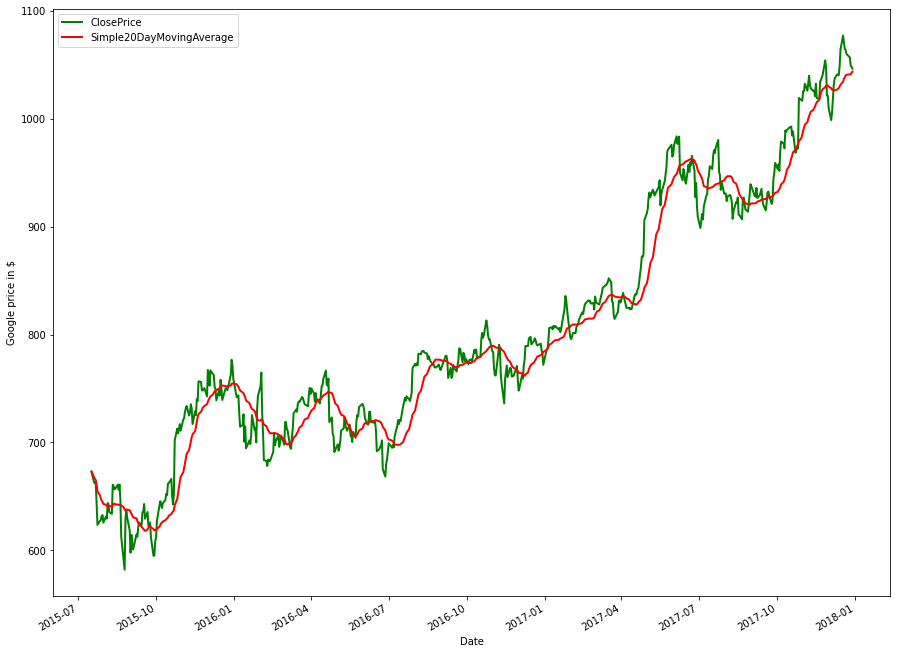

In [22]:
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(ylabel='Google price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
sma.plot(ax=ax1, color='r', lw=2., legend=True)
plt.show()